### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

## Import Dataset

In [2]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
dataset = pd.read_csv('student_scores.csv')
df = dataset.copy()
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# show 5 rows data
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [ ]:
# get information data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# get describes basic stat dataset used
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


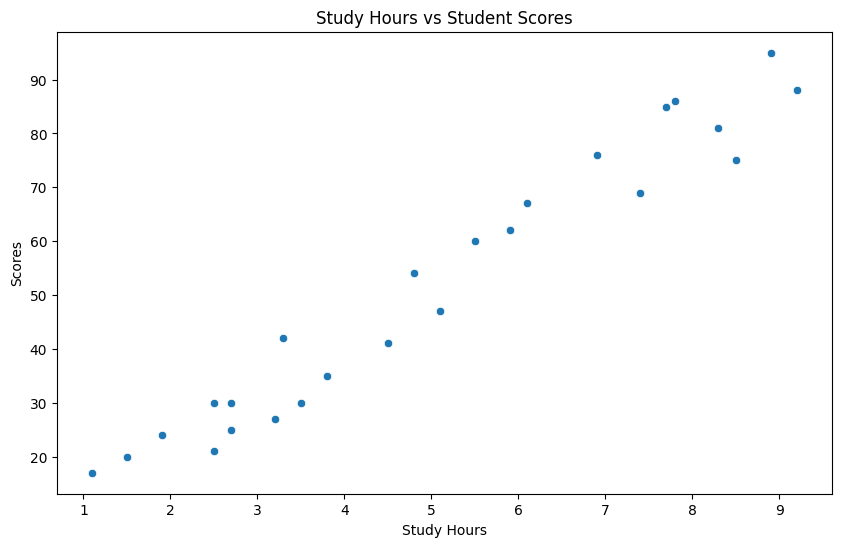

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset, x='Hours', y='Scores')
plt.title('Study Hours vs Student Scores')
plt.ylabel('Scores')
plt.xlabel('Study Hours')
plt.show()

Feature engineering :
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis

## Investigate of Feature Engineering

In [13]:
# check data to makesure there's no duplicate data
print('data before checking duplicate')
print(df.shape)

data before checking duplicate
(25, 2)


In [ ]:
duplicate_rows_before = df[df.duplicated()]
print('data duplicate before: ', len(duplicate_rows_before))

data duplicate before:  0


In [ ]:
# delete duplicate data
df = df.drop_duplicates()
print('data after checking duplicate')
print(df.shape)

data after checking duplicate
(25, 2)


In [ ]:
# check data with missing value
print(df.isna().sum())

Hours     0
Scores    0
dtype: int64


## No Missing Value

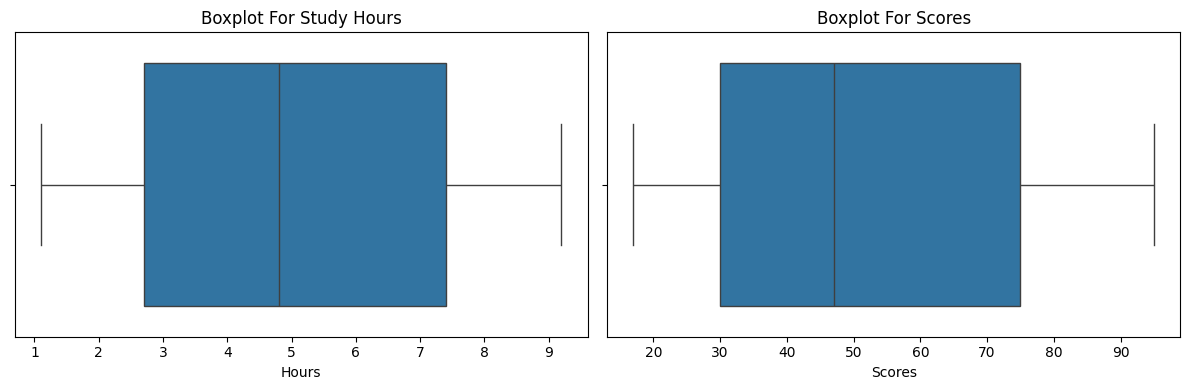

In [14]:
# Outlier analysis with boxplot
plt.figure(figsize=(12, 4))

# Boxplot for hours
plt.subplot(1,2,1)
sns.boxplot(x=df['Hours'])
plt.title('Boxplot For Study Hours')

# Boxplot for scores
plt.subplot(1,2,2)
sns.boxplot(x=df['Scores'])
plt.title('Boxplot For Scores')

plt.tight_layout()

**Conclusion: No outliers value were found in both variables**

## Splitting data

In [15]:
# Study hours spend
X = df['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [17]:
# Student scores
y = df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [1]:
# Import machine learning data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
# Split the train data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
# train_size 0.75 -> 75% for training and 25% for test
# random_state = 42 -> for result split still same each time
# X_train for data Hours train
# X_test for data Hours test
# y_train for data Scores train
# y_test for data Scores test

In [20]:
# Reshape features into 2D Array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1,1)

In [ ]:
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

## Linear Regression

In [4]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

In [21]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the scores for the test values
y_pred = lr_model.predict(X_test)
# y_pred -> Student Scores

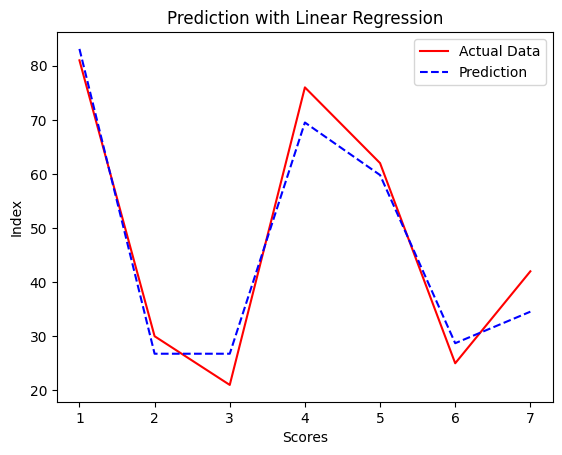

In [24]:
# Plotting the actual and predicted values
c = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot(c, y_pred, color='b', linestyle='dashed', label='Prediction')
plt.xlabel('Scores')
plt.ylabel('Index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Calculate R square value
rsq = r2_score(y_test, y_pred)
print('R squre Linear Regression: ', rsq)

R squre Linear Regression:  0.9553509219739938


In [ ]:
# Print model parameters
print('Intercept of the Linear Regression model: ', lr_model.intercept_)
print('Coefficient of the Linear Regression model: ', lr_model.coef_)

Intercept of the Linear Regression model:  2.4803670915057623
Coefficient of the Linear Regression model:  [9.71409219]


Then it is said to form a line with result in Linear Regression

## y = 2.48 + 9.714 x

x is the value of study hours

In [25]:
nilai_y = lr_model.intercept_ + lr_model.coef_[0] * 9.6
print('\nnilai y : ', nilai_y)


nilai y :  95.73565214073113


Decision Tree Regressor Using another Machine Learning Model :

1. Decision Tree
2. Random Forest

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
y_pred = dt_model.predict(X_test)

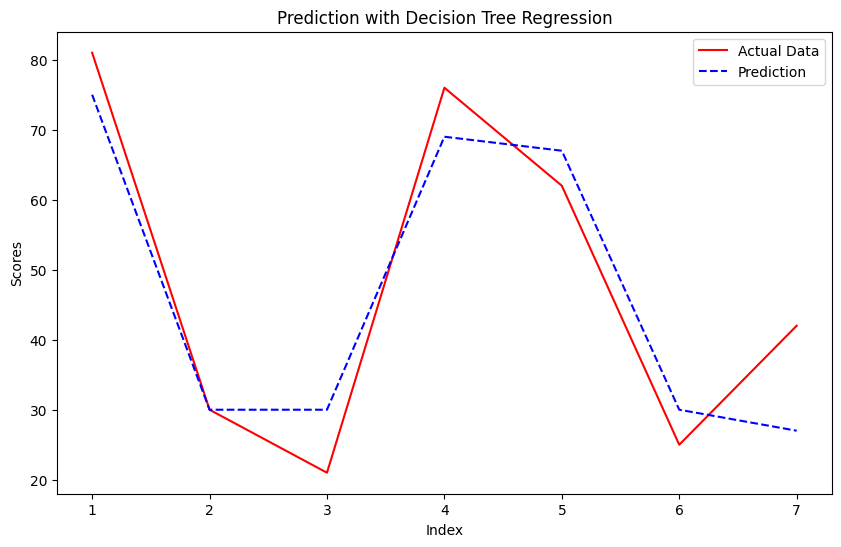

In [29]:
plt.figure(figsize=(10,6))
c = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot(c, y_pred, color='b', linestyle='--', label='Prediction')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.title('Prediction with Decision Tree Regression')
plt.legend()
plt.show()

In [30]:
dt_r2 = r2_score(y_test, y_pred)

In [32]:
print(f'R-squared score: {dt_r2}')

R-squared score: 0.8803859268443893


# Model Evaluation

### Linear Regression
- R-squared: 0.955 (95.5%)
- Produces smooth and consistent predictions
- Resulting formula: y = 2.48 + 9.714x
(where x is study hours and y is predicted score)

### Decision Tree
- R-squared: 0.879 (87.9%)
- Produces more discrete (step-wise) predictions
- Feature importance shows study hours as a highly significant factor

# Conclusion
Linear Regression is the best model for this case because Higher R-squared score and Practicality